In [1]:
import pandas as pd

In [6]:
def load_data(filename):
    return pd.read_csv("titanic_disaster.csv")

In [7]:
filename="D:\lab4-2274802010174-BuiBaMinhDang\titanic_disaster.csv"
tidisater=load_data(filename)
tidisater.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<bound method DataFrame.count of      PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

      

<AxesSubplot:>

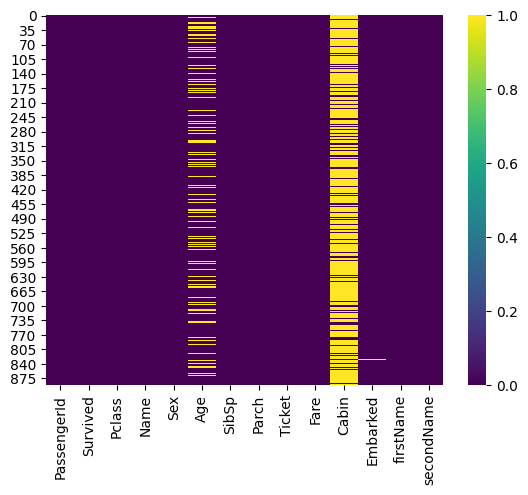

In [15]:
dfage = tidisater[tidisater["Age"].isna()]
print(dfage.count)

dfcarbin=tidisater[tidisater["Cabin"].isna()]
print(dfcarbin.count)

dfembarked=tidisater[tidisater["Embarked"].isna()]
print(dfembarked.count)

import seaborn as sns
sns.heatmap(tidisater.isna(), cmap='viridis')

In [18]:
tidisater[['firstName','secondName']]=tidisater['Name'].str.split(',',expand=True)
tidisater_splitname =tidisater.drop("Name",axis=1)
tidisater_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [19]:
def substitute_Sex(x_df):
    mapping={'male':'M','female':'F'}
    x_df['Sex']=x_df['Sex'].map(mapping)
    return x_df

In [20]:
tidisaterS=tidisater_splitname.pipe(substitute_Sex)
tidisaterS.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

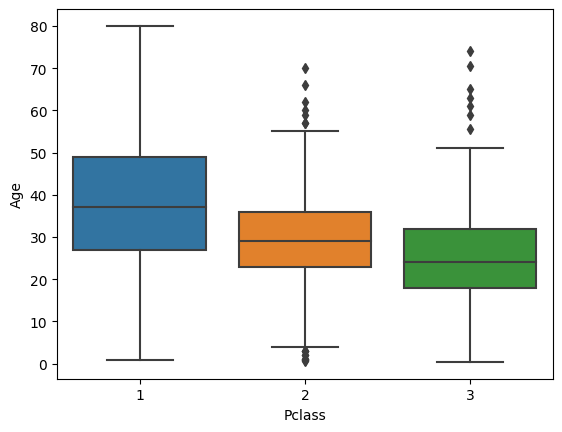

In [26]:
import seaborn as sns
sns.boxplot(y='Age',x='Pclass',data=tidisaterS)


In [27]:
tidisaterS["Age"][tidisaterS["Pclass"]==1]=tidisaterS["Age"][tidisaterS["Pclass"]==1].fillna(tidisaterS["Age"][tidisaterS["Pclass"]==1].median(),inplace=False)
tidisaterS["Age"][tidisaterS["Pclass"]==2]=tidisaterS["Age"][tidisaterS["Pclass"]==2].fillna(tidisaterS["Age"][tidisaterS["Pclass"]==2].median(),inplace=False)
tidisaterS["Age"][tidisaterS["Pclass"]==3]=tidisaterS["Age"][tidisaterS["Pclass"]==3].fillna(tidisaterS["Age"][tidisaterS["Pclass"]==3].median(),inplace=False)

C:\Users\US\AppData\Local\Temp\ipykernel_2456\3556573680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidisaterS["Age"][tidisaterS["Pclass"]==1]=tidisaterS["Age"][tidisaterS["Pclass"]==1].fillna(tidisaterS["Age"][tidisaterS["Pclass"]==1].median(),inplace=False)
C:\Users\US\AppData\Local\Temp\ipykernel_2456\3556573680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidisaterS["Age"][tidisaterS["Pclass"]==2]=tidisaterS["Age"][tidisaterS["Pclass"]==2].fillna(tidisaterS["Age"][tidisaterS["Pclass"]==2].median(),inplace=False)
C:\Users\US\AppData\Local\Temp\ipykernel_2456\3556573680.py:3: SettingWithCopyWarning: 


In [28]:

%matplotlib inline
%config InlineBackend.figure_format='svg'
sns.heatmap(tidisaterS.isna(),yticklabels=False,cbar=True,cmap='viridis')

<AxesSubplot:>

In [29]:
tidisaterS.loc[(tidisaterS['Age']<=12),'Agegroup']='Kid'
tidisaterS.loc[(tidisaterS['Age']>12)&(tidisaterS['Age']<18),'Agegroup']='Teen'
tidisaterS.loc[(tidisaterS['Age']>=18)&(tidisaterS['Age']<=60),'Agegroup']='Adult'
tidisaterS.loc[(tidisaterS['Age']>60),'Agegroup']='Older'

In [30]:
tidisaterS.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


In [31]:
listNamePrefix=[]
for index,row in tidisaterS.iterrows():
    vitri=row['secondname'].strip().find(' ')
    secondname=row['secondName'].strip()
    namePrefix=secondname[vitri+1:]
    listNamePrefix.append(namePrefix)
cotNamePrefix=pd.DataFrame(listNamePrefix,columns=['namePrefix'])
tidisaterS=pd.concat([tidisaterS,cotNamePrefix],axis=1,sort=False)
print(tidisaterS)

KeyError: 'secondname'